In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#number of input nodes = 2
inp=2
#implementing ANN for XOR gate with K layers
k=2
#hidden layer contains 10 nodes
n=10

xor=np.array([[0,0],[0,1],[1,0],[1,1]])
target=np.array([[0],[1],[1],[0]])

epochs = 10000
lr = 0.01

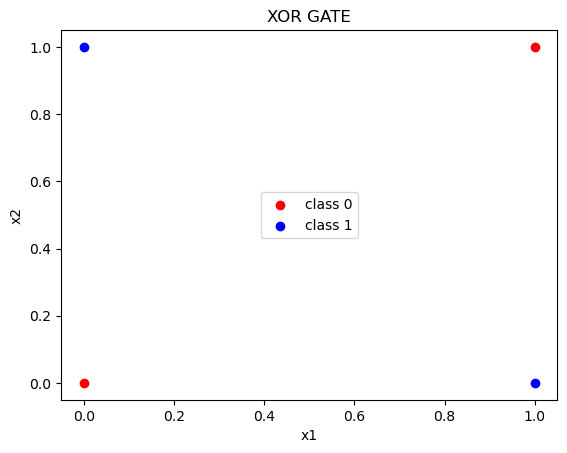

In [21]:
#plotting the data
for i in range(len(target)):
    if target[i]==0:
        colour='red'
    else:
        colour='blue'
    plt.scatter(xor[i,0],xor[i,1],color=colour)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR GATE')
plt.legend(["class 0", "class 1"], loc ="center")

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x*(1-x)

In [23]:
def linear(x,w,bias):
    y=np.dot(x,w)+bias
    return y
def final_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [24]:
def forward_pass(X,w1,w2,w3,b1,b2,b3):
    Z1 = np.dot(X, w1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, w2) + b2
    A2 = sigmoid(Z2)
    output = np.dot(A2, w3) + b3
    return A1,A2,output

In [25]:
def backward_pass(X,y_true,A1,A2,output,lr,W1,W2,W3,b1,b2,b3):
    m = X.shape[0]

    # Computing gradients
    dZ3 = 2 * (output - y_true) / m
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
    return W1,W2,W3,b1,b2,b3
    

In [26]:
#taking random weights
w1 = np.random.randn(inp,n)
bias1 = np.random.randn(1,n)
w2 = np.random.randn(n,n)
bias2 = np.random.randn(1, n)
w3 = np.random.randn(n,1)
bias3 = np.random.randn(1,1)

Predictions: [0.00261398 0.99708528 0.99756621 0.00283726]
Training Accuracy: 1.0


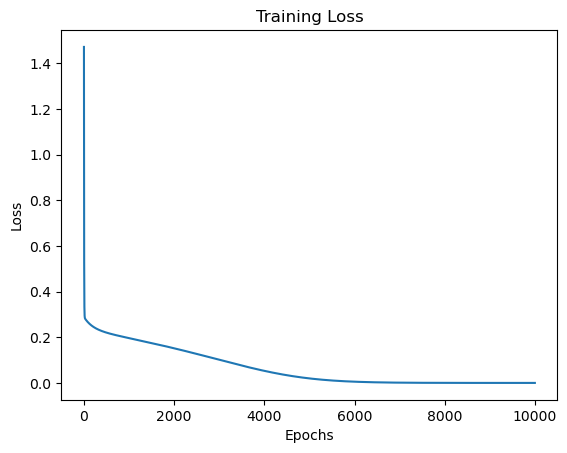

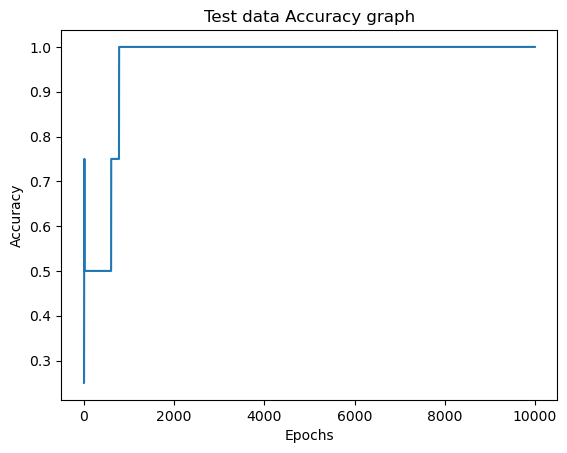

In [27]:
losses = []
accuracy = []
for epoch in range(epochs):
    # Forward pass
    A1,A2,y_pred = forward_pass(xor,w1,w2,w3,bias1,bias2,bias3)

    # Compute loss
    loss = final_loss(target, y_pred)
    acc= np.mean(np.round(y_pred) == target)
    losses.append(loss)
    accuracy.append(acc)

    # Backward pass
    w1,w2,w3,bias1,bias2,bias3=backward_pass(xor,target,A1,A2,y_pred,lr,w1,w2,w3,bias1,bias2,bias3)

x,y,predictions = forward_pass(xor,w1,w2,w3,bias1,bias2,bias3)
print("Predictions:", predictions.flatten())
print("Training Accuracy:", np.mean(np.round(predictions) == target))

# Plot the training loss over iterations
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

plt.plot(range(epochs), accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test data Accuracy graph')
plt.show()